In [392]:
#read the training data 
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
trainingdata= pd.read_csv('D:/training/training.csv')


In [393]:
#Look at the first 10 rows
trainingdata

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


In [394]:
# check the summary statistics
trainingdata.describe()


,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [395]:
#Check type of column
trainingdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [396]:
#check for missing values
trainingdata.isnull().sum()


RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [397]:

list(trainingdata.columns.values)


['RefId',
 'IsBadBuy',
 'PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [398]:
#Since two columns are completely null we can completey drop prime unit  and AUCGUART variables
trainingdata=trainingdata.drop('PRIMEUNIT',axis=1)


In [399]:
trainingdata=trainingdata.drop('AUCGUART',axis=1)

In [400]:
list(trainingdata.columns.values)

['RefId',
 'IsBadBuy',
 'PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [401]:
# Missing value treatment for other variables
trainingdata['MMRAcquisitionAuctionAveragePrice'].fillna(trainingdata['MMRAcquisitionAuctionAveragePrice'].median())
trainingdata['MMRAcquisitionAuctionCleanPrice'].fillna(trainingdata['MMRAcquisitionAuctionCleanPrice'].median())
trainingdata['MMRAcquisitionRetailAveragePrice'].fillna(trainingdata['MMRAcquisitionRetailAveragePrice'].median())
trainingdata['MMRAcquisitonRetailCleanPrice'].fillna(trainingdata['MMRAcquisitonRetailCleanPrice'].median())
trainingdata['MMRCurrentAuctionAveragePrice'].fillna(trainingdata['MMRCurrentAuctionAveragePrice'].median())
trainingdata['MMRCurrentRetailAveragePrice'].fillna(trainingdata['MMRCurrentRetailAveragePrice'].median())
trainingdata['MMRCurrentRetailCleanPrice'].fillna(trainingdata['MMRCurrentRetailCleanPrice'].median())
#the other columns in the dataset which are having missing values is around 2000-3000 values which is around 3-4% of the overall dataset size. So we can just drop them
#so we can just drop those rows
trainingdata=trainingdata.dropna(axis=0)


In [402]:
trainingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Data columns (total 32 columns):
RefId                                67270 non-null int64
IsBadBuy                             67270 non-null int64
PurchDate                            67270 non-null object
Auction                              67270 non-null object
VehYear                              67270 non-null int64
VehicleAge                           67270 non-null int64
Make                                 67270 non-null object
Model                                67270 non-null object
Trim                                 67270 non-null object
SubModel                             67270 non-null object
Color                                67270 non-null object
Transmission                         67270 non-null object
WheelTypeID                          67270 non-null float64
WheelType                            67270 non-null object
VehOdo                               67270 non-null int64
Nationalit

In [403]:
#select columns which are object types

obj_df = trainingdata.select_dtypes(include=['object']).copy()
obj_df.columns

Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'VNST'],
      dtype='object')

In [404]:
#check for correlations
trainingdata.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.000804,0.009841,-0.025073,0.010399,-0.023475,-0.008453,-0.012595,-0.029515,-0.031576,-0.005417,-0.009838,-0.016344,-0.019291,0.036478,0.125912,-0.007467,-0.047527,-0.020611
IsBadBuy,0.000804,1.000000,-0.160866,0.168383,-0.044136,0.086407,-0.108914,-0.101851,-0.087388,-0.083322,-0.109025,-0.102708,-0.098982,-0.094703,-0.066160,0.000401,-0.101130,-0.008749,0.051476
VehYear,0.009841,-0.160866,1.000000,-0.957780,0.250464,-0.270030,0.593245,0.544700,0.591280,0.549398,0.604108,0.561392,0.609325,0.569342,0.279493,0.069024,0.366235,0.059620,-0.245744
VehicleAge,-0.025073,0.168383,-0.957780,1.000000,-0.241880,0.307323,-0.577221,-0.530130,-0.470172,-0.436044,-0.588234,-0.544750,-0.514603,-0.479839,-0.267897,-0.076686,-0.327416,-0.026955,0.237234
WheelTypeID,0.010399,-0.044136,0.250464,-0.241880,1.000000,-0.204980,-0.089141,-0.123215,-0.067849,-0.097328,-0.080896,-0.113546,-0.068343,-0.096653,0.188186,0.010169,-0.153675,-0.006140,-0.114922
VehOdo,-0.023475,0.086407,-0.270030,0.307323,-0.204980,1.000000,-0.016225,0.025106,0.033972,0.065870,-0.030588,0.010264,0.015663,0.048516,-0.295461,-0.057744,-0.064686,0.028654,0.406415
MMRAcquisitionAuctionAveragePrice,-0.008453,-0.108914,0.593245,-0.577221,-0.089141,-0.016225,1.000000,0.990240,0.910327,0.910519,0.935822,0.930510,0.870623,0.870049,0.105953,0.041068,0.788005,0.039569,-0.047319
MMRAcquisitionAuctionCleanPrice,-0.012595,-0.101851,0.544700,-0.530130,-0.123215,0.025106,0.990240,1.000000,0.902404,0.918513,0.921260,0.929917,0.859255,0.870029,0.060604,0.036156,0.779270,0.039139,-0.017780
MMRAcquisitionRetailAveragePrice,-0.029515,-0.087388,0.591280,-0.470172,-0.067849,0.033972,0.910327,0.902404,1.000000,0.990197,0.849776,0.847625,0.911185,0.904138,0.104586,0.030842,0.745396,0.081583,-0.049295
MMRAcquisitonRetailCleanPrice,-0.031576,-0.083322,0.549398,-0.436044,-0.097328,0.065870,0.910519,0.918513,0.990197,1.000000,0.845081,0.854052,0.901197,0.904844,0.066922,0.026731,0.744132,0.078228,-0.022904


In [406]:
#Since there is high correlation among Acquisition Price related paramters and current Price related parameters we will select only MMR current retail clean price which has s low correlation
trainingdata=trainingdata.drop(['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice'],axis=1)

ValueError: labels ['MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice'
 'MMRAcquisitionRetailAveragePrice' 'MMRAcquisitonRetailCleanPrice'
 'MMRCurrentAuctionAveragePrice' 'MMRCurrentAuctionCleanPrice'
 'MMRCurrentRetailAveragePrice'] not contained in axis

In [407]:
#Convert all categorical variables using one hot encoding
catdata=pd.get_dummies(obj_df, columns=['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size'])
newcatdata=pd.get_dummies(obj_df, columns=['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size'])

In [408]:
trainingdata.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [409]:
catdata

,PurchDate,TopThreeAmericanName,VNST,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,12/7/2009,OTHER,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,12/7/2009,CHRYSLER,FL,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,12/7/2009,CHRYSLER,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,12/7/2009,CHRYSLER,FL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12/7/2009,FORD,FL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12/7/2009,OTHER,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,12/7/2009,OTHER,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,12/7/2009,FORD,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,12/7/2009,OTHER,FL,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,12/7/2009,FORD,FL,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [411]:
#concat the one hot coded categorical variables
mydata= pd.concat([trainingdata,catdata], axis=1)


In [412]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Columns: 2017 entries, RefId to Size_VAN
dtypes: float64(3), int64(9), object(16), uint8(1989)
memory usage: 142.5+ MB


In [413]:
mydata.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,0,0,0,1,0,0,0,0,0,0
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,0,0,1,0,0,0,0,0,0,0
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,0,0,0,1,0,0,0,0,0,0
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,0,0,0,0,0,0,0,0,0,0
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,0,0,0,0,0,0,0,0,0,0


In [414]:
mydata.columns


Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel',
       ...
       'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM',
       'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN'],
      dtype='object', length=2017)

In [415]:
mydata=mydata.drop(obj_df.columns,axis=1)


In [339]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Data columns (total 12 columns):
RefId                         67270 non-null int64
IsBadBuy                      67270 non-null int64
VehYear                       67270 non-null int64
VehicleAge                    67270 non-null int64
WheelTypeID                   67270 non-null float64
VehOdo                        67270 non-null int64
MMRCurrentRetailCleanPrice    67270 non-null float64
BYRNO                         67270 non-null int64
VNZIP1                        67270 non-null int64
VehBCost                      67270 non-null float64
IsOnlineSale                  67270 non-null int64
WarrantyCost                  67270 non-null int64
dtypes: float64(3), int64(9)
memory usage: 9.2 MB


In [416]:
mydata.columns
from sklearn.model_selection import train_test_split
target=mydata['IsBadBuy']
train, test = train_test_split(mydata, test_size = 0.2)


In [417]:
train.columns

Index(['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost',
       ...
       'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM',
       'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN'],
      dtype='object', length=2001)

In [418]:
train_target=train['IsBadBuy']
test_target=test['IsBadBuy']


In [419]:
train=train.drop(['RefId','IsBadBuy','VehYear'],axis=1)
test=test.drop(['RefId','IsBadBuy','VehYear'],axis=1)

In [420]:
train=train.values
test=test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [421]:
#standardise the training variables
scaler = StandardScaler()
scaleddata=scaler.fit(train)
scaleddata=scaler.transform(train)

In [422]:
scaleddata

array([[-0.10133318,  0.97375488, -1.26553096, ..., -0.16234822,
        -0.10456033, -0.29565453],
       [-1.27195603,  0.97375488, -1.81622426, ..., -0.16234822,
        -0.10456033, -0.29565453],
       [-0.10133318, -0.9443854 ,  1.14759142, ..., -0.16234822,
        -0.10456033, -0.29565453],
       ..., 
       [-0.10133318, -0.9443854 , -2.70580575, ..., -0.16234822,
        -0.10456033, -0.29565453],
       [-0.10133318,  2.89189516, -2.51001601, ..., -0.16234822,
        -0.10456033, -0.29565453],
       [ 0.48397824,  0.97375488,  0.28303829, ..., -0.16234822,
        -0.10456033, -0.29565453]])

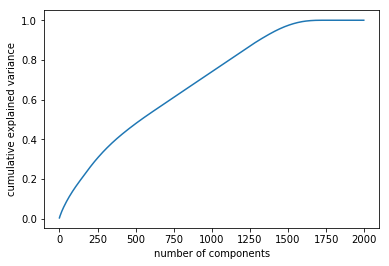

In [423]:
# To Identify the principal components
from sklearn.decomposition import PCA
pca = PCA().fit(scaleddata)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [424]:
pca_data.values

AttributeError: 'PCA' object has no attribute 'values'

In [426]:
pca = PCA(n_components=1500)
pca=pca.fit(scaleddata)
pca=pca.transform(scaleddata)

In [349]:
pca

array([[ 0.58339221,  1.17646631, -0.51241472, -0.83577761, -0.50864516],
       [-2.93299313, -0.52661691, -0.02160105,  1.04183711,  1.04568601],
       [-0.68428343, -0.18728366, -0.38394255, -0.97941465,  0.93636005],
       ..., 
       [ 3.04139534,  0.42739249,  0.40925003, -1.72818054, -2.2749288 ],
       [ 0.55548455, -0.56043354,  0.25503205, -1.20664109,  0.15649982],
       [ 0.94929608, -1.09413162,  0.51931245,  0.39963755,  0.08286408]])

In [427]:
#fit model using random model classifier

from sklearn.ensemble import RandomForestClassifier

In [431]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(pca,train_target)

In [432]:
pred=clf.predict(pca)

In [433]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [434]:
#check accuracy of training data
from sklearn import metrics

In [435]:
metrics.confusion_matrix(pred,train_target)

array([[48672,   913],
       [   12,  4219]])

In [436]:
roc_auc_score(pred, train_target)

0.98937548230316352

In [439]:
#standardise test data
scaler2 = StandardScaler()
scaleddata2=scaler2.fit(test)
scaleddata2=scaler.transform(test)
pca2 = PCA(n_components=1500)
pca2=pca2.fit(scaleddata2)
pca2=pca2.transform(scaleddata2)

In [440]:
#check accuracy of test data
pred2=clf.predict(pca2)

In [371]:
metrics.confusion_matrix(pred2,test_target)

array([[12046,  1327],
       [   75,     6]])

In [441]:
roc_auc_score(pred2,test_target)

0.51280165192165017